# Analysis of Synthetically Generated Data
Validating that the sampling produces data of the correct characteristics

In [1]:
import init
from common import constants as cn
from common.data_provider import DataProvider
from common import transform_data
from common_python.statistics import empirical_distribution_generator, density, multiple_density
from common_python.plots import util_plots

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Common Codes

In [2]:
def analyze(is_decorrelate):
    df_data = transform_data.aggregateGenes()
    df_data = df_data.T
    columns_data = df_data.columns
    df_data.columns = range(len(columns_data))
    empirical = empirical_distribution_generator.EmpiricalDistributionGenerator(df_data)
    df_gen = empirical.sample(1000, is_decorrelate=False)
    # Plot the marginals
    density_data = multiple_density.MultipleDensity(df_data, [-1, 0, 1])
    density_gen = multiple_density.MultipleDensity(df_gen, [-1, 0, 1])
    density_data.plotMarginalComparisons(density_gen, xlabel="Original", ylabel="Generated")
    # Plot the correlations
    df_corr_data = df_data.cor()
    util_plots.plotCategoricalHeatmap(df_corr_data, title="Original")
    df_corr_data = df_data.cor()
    util_plots.plotCategoricalHeatmap(df_corr_data, title="Original")
    

## Reproduce the original distribution

In [3]:
df_data = transform_data.aggregateGenes()
df_data = df_data.T
columns_data = df_data.columns
df_data.columns = range(len(columns_data))
empirical = empirical_distribution_generator.EmpiricalDistributionGenerator(df_data)
df_gen = empirical.sample(1000, is_decorrelate=False)


In [4]:
print("nrows: %d, ncols: %d" % (len(df_gen), len(df_gen.columns)))

nrows: 1000, ncols: 1515


In [5]:
density_gen = multiple_density.MultipleDensity(df_gen, [-1, 0, 1])

In [6]:
density_gen.df.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
-1,0.928,0.88,0.922,0.841,0.687,0.771,0.579,0.372,0.649,0.608,...,0.039,0.000,0.039,0.039,0.000,0.000,0.00,0.000,0.079,0.000
0,0.072,0.12,0.078,0.159,0.313,0.229,0.421,0.628,0.351,0.272,...,0.503,0.496,0.312,0.226,0.415,0.234,0.25,0.381,0.073,0.152
1,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.120,...,0.458,0.504,0.649,0.735,0.585,0.766,0.75,0.619,0.848,0.848


In [7]:
density_raw = multiple_density.MultipleDensity(df_data, [-1, 0, 1])
density_raw.df.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
-1,0.923077,0.884615,0.923077,0.846154,0.692308,0.769231,0.576923,0.384615,0.653846,0.615385,...,0.038462,0.0,0.038462,0.038462,0.000000,0.000000,0.000000,0.000000,0.076923,0.000000
0,0.076923,0.115385,0.076923,0.153846,0.307692,0.230769,0.423077,0.615385,0.346154,0.269231,...,0.500000,0.5,0.307692,0.230769,0.423077,0.230769,0.230769,0.384615,0.076923,0.153846
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.115385,...,0.461538,0.5,0.653846,0.730769,0.576923,0.769231,0.769231,0.615385,0.846154,0.846154


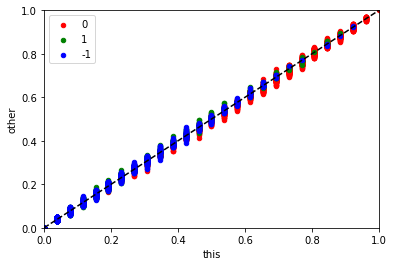

In [8]:
density_raw.plotMarginalComparisons(density_gen)

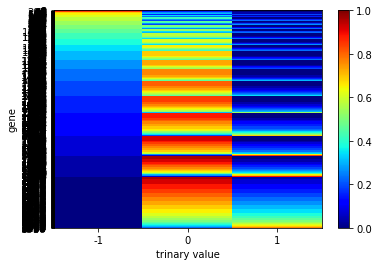

In [9]:
_ = density_raw.plotMarginals(xlabel="trinary value", ylabel="gene")

## Reproduce the original covariance structure

In [10]:
df_corr_raw = df_data.corr()
len(df_corr_raw)

1515

In [11]:
df_corr_raw_adj = df_corr_raw -pd.DataFrame(np.identity(1515))
df_corr_raw_adj.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
0,0.000000,0.347524,0.458333,0.276956,0.120281,0.184466,0.337100,0.228218,0.396746,0.416333,...,-0.215562,-0.288675,-0.317221,-0.371154,-0.337100,-0.527046,-0.184466,-0.365148,-0.636501,-0.677003
1,0.347524,0.000000,0.347524,0.179664,0.280900,0.373649,0.178068,0.038069,0.243315,0.260434,...,-0.482167,-0.361158,-0.611842,-0.464345,-0.421741,-0.373649,-0.373649,-0.456832,-0.482617,-0.513327
2,0.458333,0.347524,0.000000,0.677003,0.433013,0.184466,0.337100,0.228218,0.396746,0.208167,...,-0.215562,0.000000,-0.059479,-0.103098,-0.044947,-0.184466,-0.527046,-0.365148,-0.135015,-0.276956
3,0.276956,0.179664,0.677003,0.000000,0.639602,0.019462,0.497930,0.337100,0.586033,0.307482,...,-0.318406,-0.213201,0.102499,0.045686,0.149379,-0.019462,-0.272475,-0.320245,-0.014245,-0.113636
4,0.120281,0.280900,0.433013,0.639602,0.000000,-0.167360,0.441149,0.527046,0.565916,0.480740,...,-0.350736,-0.166667,-0.137361,-0.238095,0.064875,-0.228218,-0.030429,-0.329404,-0.311805,-0.408635


In [12]:
xx = [max(np.abs(df_corr_raw_adj[c])) for i, c in enumerate(df_corr_raw_adj.columns)]

In [13]:
len([v for v in xx if v > 0.9])

805

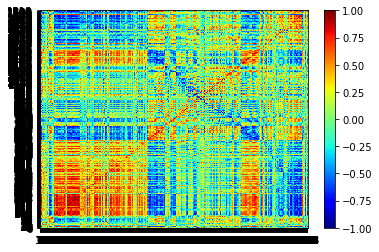

In [14]:
util_plots.plotCategoricalHeatmap(df_corr_raw)

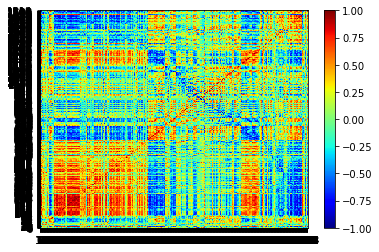

In [15]:
df_corr_gen = df_gen.corr()
util_plots.plotCategoricalHeatmap(df_corr_gen)

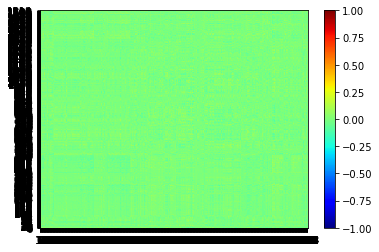

In [16]:
# Differences in correlation structure
util_plots.plotCategoricalHeatmap(df_corr_raw - df_corr_gen, vmin=-1.0, vmax=1.0)

In [17]:
df_corr_gen.head()

,0,1,2,3,4,5,6,7,8,9,...,1505,1506,1507,1508,1509,1510,1511,1512,1513,1514
0,1.000000,0.278100,0.380617,0.217429,0.078956,0.142818,0.326656,0.214380,0.378757,0.415311,...,-0.205853,-0.280780,-0.302306,-0.360258,-0.330709,-0.503963,-0.125080,-0.355038,-0.636834,-0.657913
1,0.278100,1.000000,0.259796,0.108726,0.221914,0.391958,0.127649,-0.027759,0.186204,0.213507,...,-0.484588,-0.372241,-0.614308,-0.420423,-0.438433,-0.311965,-0.362441,-0.470687,-0.437045,-0.452223
2,0.380617,0.259796,1.000000,0.668931,0.430911,0.125467,0.341099,0.223858,0.395504,0.202800,...,-0.214955,0.049880,-0.010483,-0.057431,0.002800,-0.121089,-0.503782,-0.370736,-0.089995,-0.209225
3,0.217429,0.108726,0.668931,1.000000,0.644179,-0.028708,0.509916,0.334651,0.591248,0.303170,...,-0.321340,-0.186707,0.146014,0.083016,0.188620,0.033627,-0.241565,-0.267034,0.022322,-0.059656
4,0.078956,0.221914,0.430911,0.644179,1.000000,-0.203631,0.468353,0.519500,0.583478,0.489117,...,-0.365709,-0.162830,-0.111000,-0.223805,0.078321,-0.197419,0.001245,-0.265313,-0.292935,-0.386970


## Maintain marginals with random replacement, but eliminate covariances.

In [18]:
df_trinary = transform_data.aggregateGenes()
df_data = df_trinary.T
df_data = df_data.drop(index="T0")
df_data = df_data.copy()

In [ ]:
generator = empirical_distribution_generator.EmpiricalDistributionGenerator(df_data)
df_gen = generator.synthesize(25, 0.0)

In [ ]:
def plotSynthesizes(frac):
    SEL_FRAC = 1.0
    ncols = int(SEL_FRAC*len(df_data.columns))
    columns_sub = np.random.permutation(df_data.columns.tolist())[range(ncols)]
    df_sub = df_data[list(columns_sub)]
    generator = empirical_distribution_generator.EmpiricalDistributionGenerator(df_sub)
    df_sub.columns = range(len(columns_sub))
    df_base = generator.synthesize(len(df_data), 0.0)
    df_gen = generator.synthesize(len(df_data), frac)
    trunc_frac = int(100*frac)
    util_plots.plotCategoricalHeatmap(df_gen.corr(), vmin=-1, vmax=1, title="Decor Pct: %d" % trunc_frac)

In [ ]:
for frac in [0.0, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    plt.figure()
    df = plotSynthesizes(frac)